# Маркетинговая аналитика Яндекс.Афиши

В этом проекте мы будем работать с основными понятиями юнит-экономики! Для этого нам понадобятся старые знакомые `pandas`, `numpy`, `matplotlib` и `seaborn`.
Цель проекта - помочь маркетологам снизить расходы: отказаться от невыгодных источников трафика и перераспределить бюджет. Нам предстоит узнать как клиенты пользуются сервисом, когда делают первые покупки на сайте, сколько денег приносит компании каждый клиент и когда расходы на привлечение клиента окупаются. В нашем распоряжении есть данные с июня 2017 года по конец мая 2018 года: лог сервера с данными о посещениях сайта Яндекс.Афиши, выгрузка всех заказов за этот период и статистика рекламных расходов. Для выполнения работы мы сделаем следующее:

1. [Загрузим данные и подготовим их к анализу](#import)
2. [Рассчитаем метрики и выполним визуализацию:](#met)

    1. [Продуктовые метрики](#prod)
    
    2. [Метрики электронной коммерции](#ecom)
    
    3. [Маркетинговые метрики](#mark)
    
3. [Сформулируем рекомендации и выводы](#concl)

За работу!

## <a id="import">Импорт и предобработка данных</a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = ['/datasets/visits_log.csv', '/datasets/orders_log.csv', '/datasets/costs.csv']
visits = pd.read_csv(data[0])
orders = pd.read_csv(data[1])
costs = pd.read_csv(data[2])

In [3]:
dfs = [visits, orders, costs]
names = ['Визиты','Заказы','Расходы']
for df, name in zip(dfs, names):
    print(f'Первый взгляд на {name}')
    display(df.head())
    print('Общая информация:')
    df.info()
    print('Дублирующихся значений:', df.duplicated().sum())
    print('Отсутствующие значения:')
    display(df.isna().sum())
    print('Описательные статистики:')
    display(df.describe())
    print('***')

Первый взгляд на Визиты


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
Дублирующихся значений: 0
Отсутствующие значения:


Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

Описательные статистики:


,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


***
Первый взгляд на Заказы


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
Дублирующихся значений: 0
Отсутствующие значения:


Buy Ts     0
Revenue    0
Uid        0
dtype: int64

Описательные статистики:


,Revenue,Uid
count,50415.000000,5.041500e+04
mean,4.999647,9.098161e+18
std,21.818359,5.285742e+18
min,0.000000,3.135781e+14
25%,1.220000,4.533567e+18
50%,2.500000,9.102274e+18
75%,4.890000,1.368290e+19
max,2633.280000,1.844617e+19


***
Первый взгляд на Расходы


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
Дублирующихся значений: 0
Отсутствующие значения:


source_id    0
dt           0
costs        0
dtype: int64

Описательные статистики:


,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000


***


В датафрейме "Визиты" содержится информация о 359,4 тыс. посещений Яндекс.Афиши, в "Заказах" - о 50415 заказах на сайте, в "Расходах" - данные о рекламных компаниях и их стоимости. Пропущенных и дублирующихся значений нет. Предстоит исправить временные форматы, чем мы сейчас и займемся. Также стоит переназвать столбцы, чтобы перфекционисты были довольны, а нам было удобнее обращаться к ним (к столбцам).

In [4]:
for df, name in zip(dfs, names):
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.replace(' ', '_')
    print(f'Столбцы в датафрейме {name}:', df.columns)

Столбцы в датафрейме Визиты: Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], dtype='object')
Столбцы в датафрейме Заказы: Index(['buy_ts', 'revenue', 'uid'], dtype='object')
Столбцы в датафрейме Расходы: Index(['source_id', 'dt', 'costs'], dtype='object')


In [5]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
costs['dt'] = pd.to_datetime(costs['dt'], format='%Y-%m-%d')

## <a id="met">Расчет пользовательских метрик</a>

### <a id="prod">Продуктовые метрики</a>

Для начала - DAU, WAU и MAU (количество уникальных пользователей в день, неделю и месяц соответственно)

In [6]:
visits['year'] = visits['start_ts'].astype('datetime64[Y]')
visits['month'] = visits['start_ts'].astype('datetime64[M]')
visits['week'] = visits['start_ts'].astype('datetime64[W]')
visits['date'] = visits['start_ts'].dt.date

In [7]:
dau = visits.groupby('date').agg({'uid':'nunique'})['uid'].mean().round(2)
wau = visits.groupby(['year','week']).agg({'uid':'nunique'})['uid'].mean().round(2)
mau = visits.groupby(['year','month']).agg({'uid':'nunique'})['uid'].mean().round(2)
aus = [dau, wau, mau]
aunames = ['DAU', 'WAU', 'MAU']
print('Метрики тщеславия:')
for au, auname in zip(aus, aunames):
    print(f'{auname} :', au)
print('Sticky factor DAU/WAU: {:.2%};'.format(dau / wau), 'Sticky factor DAU/MAU: {:.2%}'.format(dau / mau))

Метрики тщеславия:
DAU : 907.99
WAU : 5621.7
MAU : 23228.42
Sticky factor DAU/WAU: 16.15%; Sticky factor DAU/MAU: 3.91%


В среднем на Афишу заходят в день 908 человек, в неделю - 5621, а в месяц - около 23 тысяч. Липкие факторы для недели и месяца - 16,15% и 3,91%. Определим, сколько раз пользователи в среднем заходят на сайт:

Среднее число заходов в день: 1.082
Среднее число заходов в неделю: 1.175


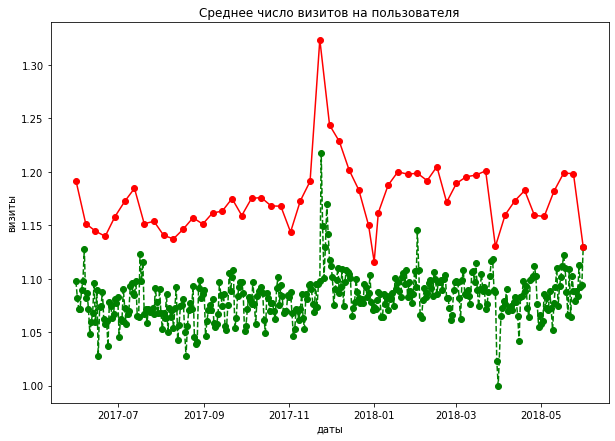

In [8]:
visits_per_user = visits.groupby('date', as_index=False).agg({'uid':['count','nunique']})
visits_per_user.columns = ['date', 'visits', 'users']
visits_per_user['visits_per_user'] = visits_per_user['visits'] / visits_per_user['users']
visits_per_user_weeks = visits.groupby(['year','week']).agg({'uid':['count','nunique'], 'date':'min'})
visits_per_user_weeks.columns = ['visits', 'users', 'date']
visits_per_user_weeks['visits_per_user'] = visits_per_user_weeks['visits'] / visits_per_user_weeks['users']
print('Среднее число заходов в день: {:.3f}'.format(visits_per_user['visits_per_user'].mean()))
print('Среднее число заходов в неделю: {:.3f}'.format(visits_per_user_weeks['visits_per_user'].mean()))
plt.figure(figsize=[10,7])
plt.plot(
    visits_per_user['date'],
    visits_per_user['visits_per_user'], '--go', 
    visits_per_user_weeks['date'],
    visits_per_user_weeks['visits_per_user'], '-ro')
plt.title('Среднее число визитов на пользователя')
plt.ylabel('визиты')
plt.xlabel('даты')
plt.show()

На Афишу редко заходят два раза в день, два раза в неделю тоже нечасто. Обычно пользователь определяется с планами на вечер и новых событий в тот же день не ищет. Однако в декабре посетители сайта чаще заходили повторно - большой выбор событий заставлял их метаться? А сколько времени проводят пользователи на сайте?

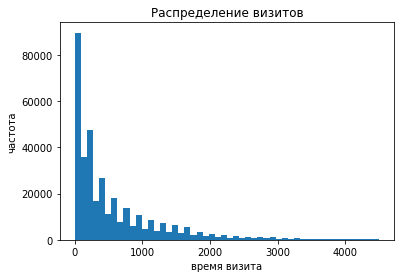

ASL, среднее: 643.51
ASL, мода: 0    60
dtype: int64
ASL, медиана: 300.0


In [9]:
visits['duration'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
plt.hist(visits['duration'], bins = 50, range=(0, np.nanpercentile(visits['duration'], q = 99, interpolation = 'midpoint')))
plt.title('Распределение визитов')
plt.ylabel('частота')
plt.xlabel('время визита')
plt.show()
print('ASL, среднее:', visits['duration'].mean().round(2))
print('ASL, мода:', visits['duration'].mode())
print('ASL, медиана:', visits['duration'].median())

В среднем пользователи проводят на сайте почти 7 минут, но чаще всего - по 60 секунд. При построении графика мы избавились от случаев, когда кто-то уснул с открытой Афишей.

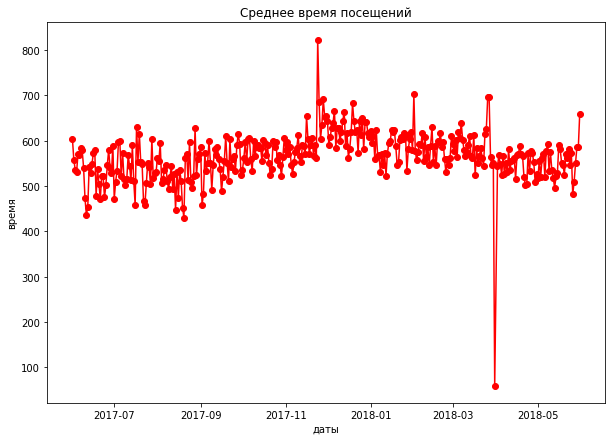

In [10]:
plt.figure(figsize=[10,7])
plt.plot(
    visits[visits['duration'] < np.nanpercentile(visits['duration'], q = 99, interpolation = 'midpoint')]
    .groupby('date').agg({'duration':'mean'})['duration'], '-ro'
)
plt.title('Среднее время посещений')
plt.ylabel('время')
plt.xlabel('даты')
plt.show()

Судя по графику, средняя длительность сессии в день меняется мало, за исключением того же околоновогоднего времени и провала в апреле. Посчитаем теперь Retention Rate, проверяя себя на этапах вычислений.

In [11]:
first_visit = visits.groupby('uid')['start_ts'].min()
first_visit.name = 'first_visit'
visits = visits.merge(first_visit, on = 'uid')
display(visits.head())

,device,end_ts,source_id,start_ts,uid,year,month,week,date,duration,first_visit
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-09 20:05:00
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-01-01,2018-03-01,2018-03-08,2018-03-09,1680,2018-03-09 20:05:00


In [12]:
visits['first_visit_month'] = visits['first_visit'].astype('datetime64[M]')
visits['visit_month'] = visits['date'].astype('datetime64[M]')
visits['cohort_lifetime'] = (
    (visits['visit_month'] - visits['first_visit_month']
    ) / np.timedelta64(1, 'M')).round().astype('int')
visits_grouped_by_cohorts = visits.groupby(['first_visit_month', 'cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
display(visits_grouped_by_cohorts.head())

,first_visit_month,cohort_lifetime,uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909


In [13]:
initial_users = visits_grouped_by_cohorts[visits_grouped_by_cohorts['cohort_lifetime'] == 0][
    ['first_visit_month', 'uid']
]
initial_users = initial_users.rename(columns={'uid':'cohort_users'})
visits_grouped_by_cohorts = visits_grouped_by_cohorts.merge(initial_users, on = 'first_visit_month')
visits_grouped_by_cohorts['retention'] = visits_grouped_by_cohorts['uid'] / visits_grouped_by_cohorts['cohort_users']
display(visits_grouped_by_cohorts.head())

,first_visit_month,cohort_lifetime,uid,cohort_users,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,1,1043,13259,0.078664
2,2017-06-01,2,713,13259,0.053775
3,2017-06-01,3,814,13259,0.061392
4,2017-06-01,4,909,13259,0.068557


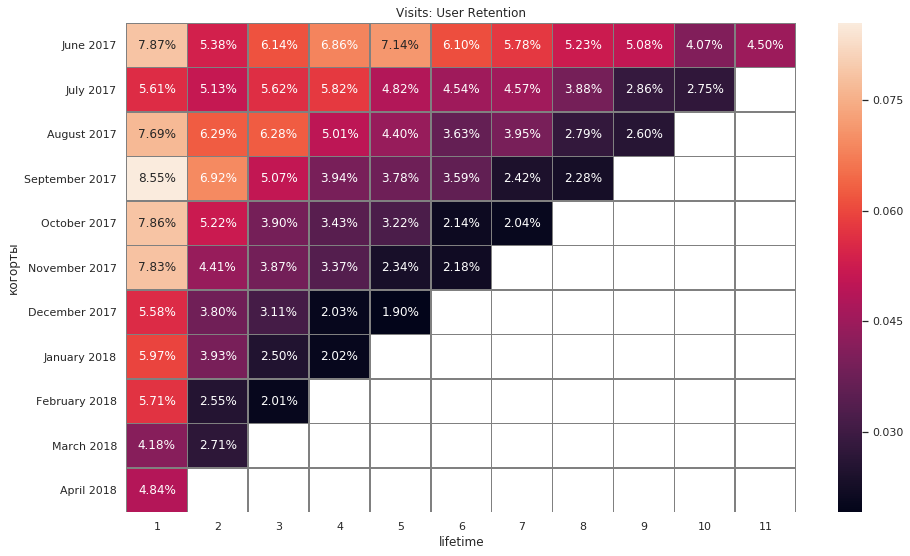

Средний RR на 2-й месяц: 6.52%


In [14]:
retention_pivot = visits_grouped_by_cohorts.pivot_table(
    index = 'first_visit_month',
    columns = 'cohort_lifetime',
    values = 'retention',
    aggfunc = 'sum'
)
ticks1 = retention_pivot.index[0:11].strftime('%B %Y')
sns.set(style='white')
plt.figure(figsize=(15, 9))
plt.title('Visits: User Retention')
# Эмпирически было установлено, что тепловые карты, содержащие столбец с суммой или иным значением,
# резко превосходящим остальные, мешают восприятию карты. От столбца, содержащего только "100%",
# можно безболезненно избавиться:)
sns.heatmap(
    retention_pivot
    .drop(columns = 0, index = retention_pivot.index[-1]), 
    annot=True, fmt='.2%', linewidths=0.5, linecolor='gray', yticklabels = ticks1
)
plt.ylabel('когорты')
plt.xlabel('lifetime')
plt.show()
print("Средний RR на 2-й месяц: {:.2%}".format(
    visits_grouped_by_cohorts[visits_grouped_by_cohorts['cohort_lifetime'] == 1]['retention'].mean())
)

Пользователи редко возвращаются к афише: не больше девяти процентов в первый месяц и семи во второй. Эти относительно высокие результаты показывает одна когорта (сентября 2017), но и результаты июня-ноября довольно неплохи, а потом RR снижается до 6 и менее. Пользователи июня 2017 остаются самыми приверженными, их RR не падает ниже 4-х. Возможно, в ноябре выкатили обновление, которое оказалось неудобным для посетителей, но "старички" уже привыкли и не стали отказываться?

### <a id="ecom">Метрики электронной коммерции</a>

In [15]:
visits = visits.merge(orders, on='uid')
group_buy = visits.groupby(['uid', 'first_visit'], as_index=False).agg({'buy_ts':'min'})
group_buy['time_to_buy'] = group_buy['buy_ts'] - group_buy['first_visit']
group_buy['time_to_buy'].describe()

count                      36523
mean     16 days 21:40:10.550064
std      47 days 01:44:46.481416
min              0 days 00:00:00
25%              0 days 00:04:00
50%              0 days 00:16:00
75%              2 days 00:17:00
max            363 days 07:04:00
Name: time_to_buy, dtype: object

В среднем пользователи покупают через 16 дней после первого визита, однако медианное значение - 16 минут (т.е. большиинство все-таки делает это при первом заходе на сайт).

In [16]:
six_months_and_more = visits.groupby('uid').agg({'cohort_lifetime':'max', 'buy_ts':'count'}).query('cohort_lifetime >=5 ').index
six_months_df = (
    visits.query('uid in @six_months_and_more and cohort_lifetime < 6')
    .groupby('uid', as_index = False)
    .agg({'buy_ts':'nunique'})
)
print('Среднее число покупок за 6 месяцев:',six_months_df.buy_ts.mean().round(2))

Среднее число покупок за 6 месяцев: 2.61


В среднем пользователи, знакомые с сайтом более полугода, совершают за это время 2,61 покупок. Not great, not terrible.

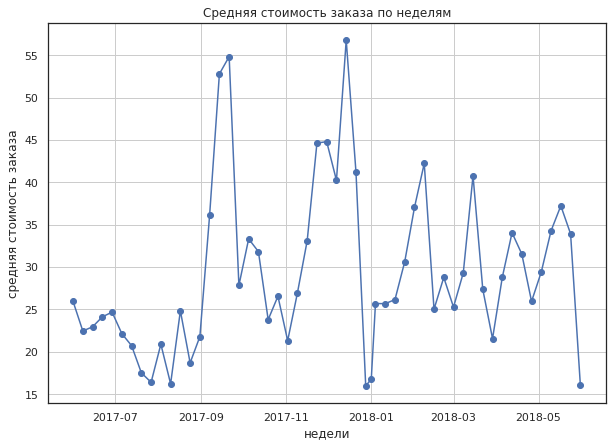

In [17]:
aov_df = visits.groupby(['year', 'week'], as_index = False).agg({'buy_ts':'nunique', 'revenue':'sum', 'date':'min'})
aov_df['aov'] = aov_df['revenue'] / aov_df['buy_ts']
plt.figure(figsize = (10,7))
plt.plot(aov_df['date'], aov_df['aov'], '-bo')
plt.title('Средняя стоимость заказа по неделям')
plt.ylabel('средняя стоимость заказа')
plt.xlabel('недели')
plt.grid(True)
plt.show()

Средняя стоимость заказа колеблется в большом диапазоне, но есть и "пиковые" недели - в новогодние праздники и, вероятно, в дни премьер.

In [18]:
orders['buy_month'] = orders['buy_ts'].astype('datetime64[M]')
first_buy_month = orders.groupby('uid').agg({'buy_month':'min'}).reset_index()
first_buy_month.columns = ['uid', 'first_buy_month']
orders = orders.merge(first_buy_month, on = 'uid', how = 'left')
cohort_sizes = orders.groupby('first_buy_month').agg({'uid':'nunique'}).reset_index()
cohort_sizes.columns = ['first_buy_month', 'buyers_month']
display(cohort_sizes)

,first_buy_month,buyers_month
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


Интересно, что в последней когорте (июня 2018) один уникальный пользователь. Это неожиданно - мы ждали данные только до конца мая. Пользователь успел попасть в выборку, но учитывать его покупку в дальнейшем мы не будем.

In [19]:
orders_grouped_by_cohorts = orders.groupby(['first_buy_month','buy_month']).agg({'revenue':'sum'}).reset_index()
orders_grouped_by_cohorts = orders_grouped_by_cohorts.merge(cohort_sizes, on = 'first_buy_month')
orders_grouped_by_cohorts['cohort_lifetime'] = (
    (orders_grouped_by_cohorts['buy_month'] - orders_grouped_by_cohorts['first_buy_month']
    ) / np.timedelta64(1, 'M')).round().astype('int')
orders_grouped_by_cohorts['ltv'] = orders_grouped_by_cohorts['revenue'] / orders_grouped_by_cohorts['buyers_month']
ltv_pivot = orders_grouped_by_cohorts.pivot_table(
    index = 'first_buy_month', columns = 'cohort_lifetime', values = 'ltv', aggfunc = 'mean'
).round(2)
output_ltv = ltv_pivot.cumsum(axis=1).round(2)
output_ltv = output_ltv[:(len(output_ltv)-1)]
display(output_ltv.fillna(''))

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_buy_month,,,,,,,,,,,,
2017-06-01,4.72,5.21,5.65,6.6,7.62,8.36,9.31,9.89,10.44,11.05,11.62,11.88
2017-07-01,6.01,6.35,6.97,7.33,7.51,7.67,7.79,7.93,8.09,8.24,8.4,
2017-08-01,5.28,5.75,6.21,6.6,7.09,7.37,7.58,7.99,8.28,8.47,,
2017-09-01,5.64,6.76,7.28,11.26,11.66,12.31,13.01,13.25,13.43,,,
2017-10-01,5.00,5.54,5.73,5.89,6.04,6.16,6.24,6.36,,,,
2017-11-01,5.15,5.55,5.75,6.07,6.22,6.27,6.38,,,,,
2017-12-01,4.74,5,5.93,7,7.31,7.65,,,,,,
2018-01-01,4.14,4.43,4.73,4.87,4.93,,,,,,,
2018-02-01,4.16,4.44,4.52,4.59,,,,,,,,


Добавим немного тепла:

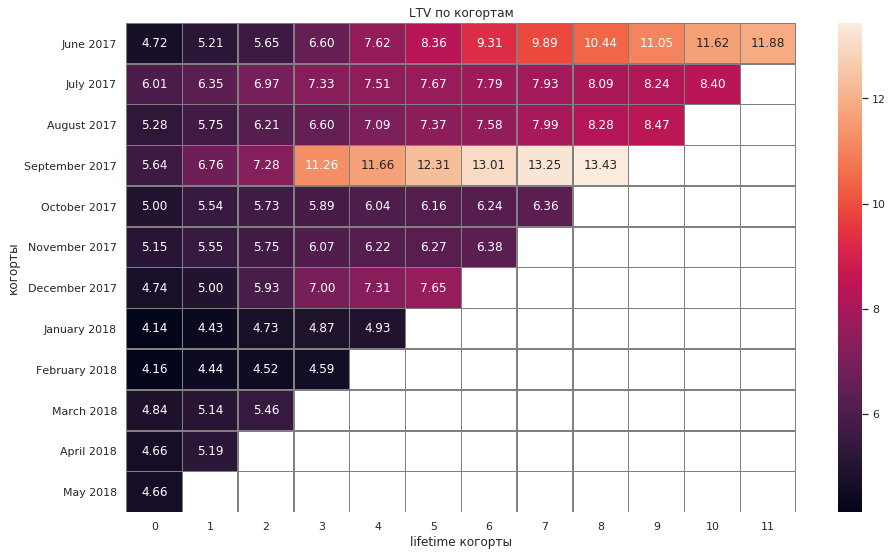

In [20]:
ticks2 = output_ltv.index.strftime('%B %Y')
sns.set(style='white')
plt.figure(figsize=(15, 9))
plt.title('LTV по когортам')
sns.heatmap(output_ltv, annot=True, linewidths=0.5, fmt='.2f', linecolor='gray',  yticklabels = ticks2)
plt.ylabel('когорты')
plt.xlabel('lifetime когорты')
plt.show()

Предсказуемо: чем старше когорта, тем больше денег она успела принести. Обращает на себя внимание когорта сентября 2017: она стала самой прибыльной, хотя прожила всего девять месяцев. Дело в аномально большой валовой прибыли с этой когорты на 4-й месяц жизни, и это не похоже на следствие системных изменений - возможно, какая-то разовая акция именно для этих пользователей. 

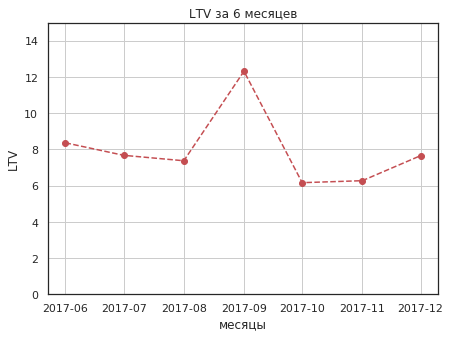

Средний ltv за 6 месяцев: 7.97


In [21]:
ltv_half_year = output_ltv[~output_ltv[5].isna()][5]
plt.figure(figsize = (7,5))
plt.plot(ltv_half_year, '--ro')
plt.title('LTV за 6 месяцев')
plt.ylabel('LTV')
plt.xlabel('месяцы')
plt.grid(True)
plt.ylim(0,15) 
plt.show()
print("Средний ltv за 6 месяцев:" , ltv_half_year.mean().round(2))

На графике виден пик для когорты сентября, манящий своей таинственностью. Средний ltv составил почти 8 у.е. с когорты.

### <a id="mark">Маркетинговые метрики</a>

In [22]:
costs['cost_month'] = costs.dt.astype('datetime64[M]')
costs_pivot = costs.pivot_table(index = 'source_id', columns = 'cost_month', values = 'costs', aggfunc='sum')
display(costs_pivot)

cost_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
source_id,,,,,,,,,,,,
1,1125.61,1072.88,951.81,1502.01,2315.75,2445.16,2341.20,2186.18,2204.48,1893.09,1327.49,1467.61
2,2427.38,2333.11,1811.05,2985.66,4845.00,5247.68,4897.80,4157.74,4474.34,3943.14,2993.70,2689.44
3,7731.65,7674.37,6143.54,9963.55,15737.24,17025.34,16219.52,14808.78,14228.56,13080.85,9296.81,9411.42
4,3514.80,3529.73,3217.36,5192.26,6420.84,5388.82,7680.47,5832.79,5711.96,5961.87,4408.49,4214.21
5,2616.12,2998.14,2185.28,3849.14,5767.40,6325.34,5872.52,5371.52,5071.31,4529.62,3501.15,3669.56
9,285.22,302.54,248.93,415.62,609.41,683.18,657.98,547.16,551.50,480.29,373.49,362.17
10,314.22,329.82,232.57,460.67,627.24,792.36,645.86,614.35,480.88,526.41,388.25,409.86


Мы построили сводную таблицу по маркетинговым затратам на источники. Осталось только визуализировать:

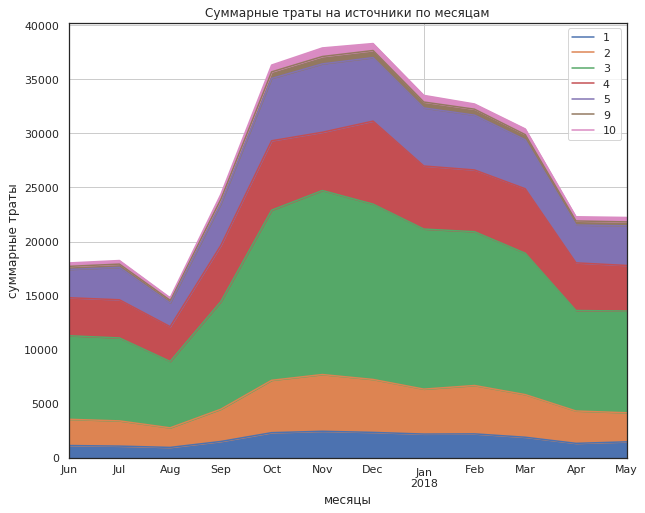

In [23]:
costs_pivot.T.plot.area(figsize = (10,8))
plt.grid(True)
plt.legend(costs_pivot.index)
plt.title('Суммарные траты на источники по месяцам')
plt.ylabel('суммарные траты')
plt.xlabel('месяцы')
plt.show()

Самым дорогостоящим является источник 3, за ним - 4, 5 и 2. В октябре-декабре портал раскошелился на привлечение пользователей. Были ли траты эффективными?

In [24]:
buyers = visits.query('revenue > 0')
buyers_source = buyers.groupby(['uid','first_visit'],as_index=False).agg({'source_id':'min'})
orders = orders.merge(buyers_source, on = 'uid')
costs = pd.merge(costs, orders.groupby('source_id', as_index=False).agg({'uid':'nunique'}), on = 'source_id')
costs = costs.rename(columns = {'uid':'buyers_source'})
costs = pd.merge(costs, cohort_sizes, left_on = 'cost_month', right_on = 'first_buy_month')
costs = costs.rename(columns = {'n_buyers':'buyers_month'})
display(costs.head())

,source_id,dt,costs,cost_month,buyers_source,first_buy_month,buyers_month
0,1,2017-06-01,75.20,2017-06-01,7133,2017-06-01,2023
1,1,2017-06-02,62.25,2017-06-01,7133,2017-06-01,2023
2,1,2017-06-03,36.53,2017-06-01,7133,2017-06-01,2023
3,1,2017-06-04,55.00,2017-06-01,7133,2017-06-01,2023
4,1,2017-06-05,57.08,2017-06-01,7133,2017-06-01,2023


Мы добавили в таблицу данные о количестве покупателей по источникам и по месяцам. Осталось добавить САС-ы.

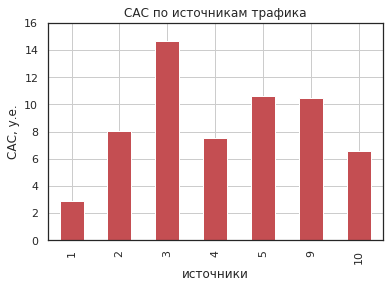

In [25]:
cac_source = costs.groupby('source_id').agg({'costs':'sum', 'buyers_source':'min'})
cac_source['cac_source'] = (cac_source['costs'] / cac_source['buyers_source']).round(2)
cac_source['cac_source'].plot(kind='bar', figsize=(6,4), color='r')
plt.grid(True)
plt.ylim(0,16) 
plt.title('CAC по источникам трафика')
plt.ylabel('САС, у.е.')
plt.xlabel('источники')
plt.show()

Customer acquisition cost выше всего для источника 3, затем пятый и девятый. Вспомним - на третий источник приходится больше всего рекламных расходов, но при этом новых покупателей приходит не так много, и покупатель становится "дорогим". "Дешевле" всего обходятся покупатели, пришедшие из первого источника.

,first_buy_month,costs,buyers_month,cac_month
0,2017-06-01,18015.00,2023,8.91
1,2017-07-01,18240.59,1923,9.49
2,2017-08-01,14790.54,1370,10.80
3,2017-09-01,24368.91,2581,9.44
4,2017-10-01,36322.88,4340,8.37
5,2017-11-01,37907.88,4081,9.29
6,2017-12-01,38315.35,4383,8.74
7,2018-01-01,33518.52,3373,9.94
8,2018-02-01,32723.03,3651,8.96
9,2018-03-01,30415.27,3533,8.61


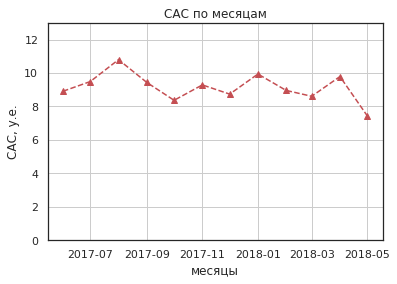

In [26]:
cac_month = costs.groupby('first_buy_month', as_index = False).agg({'costs':'sum', 'buyers_month':'min'})
cac_month['cac_month'] = (cac_month['costs'] / cac_month['buyers_month']).round(2)
display(cac_month)
plt.figure(figsize = (6,4))
plt.plot(cac_month['first_buy_month'], cac_month['cac_month'], '--r^')
plt.grid(True)
plt.ylim(0,13)
plt.title('CAC по месяцам')
plt.ylabel('САС, у.е.')
plt.xlabel('месяцы')
plt.show()

"Дороже" всего обошлась когорта августа, затем идут январская и апрельская. Самыми "дешевыми" оказались покупатели мая.

In [27]:
print('Итоговый САС для всех покупателей: {:.2f}'.format(costs['costs'].sum() / orders['uid'].nunique()))

Итоговый САС для всех покупателей: 9.02


Многовато: только две когорты смогли принести больше денег за всю свою жизнь.

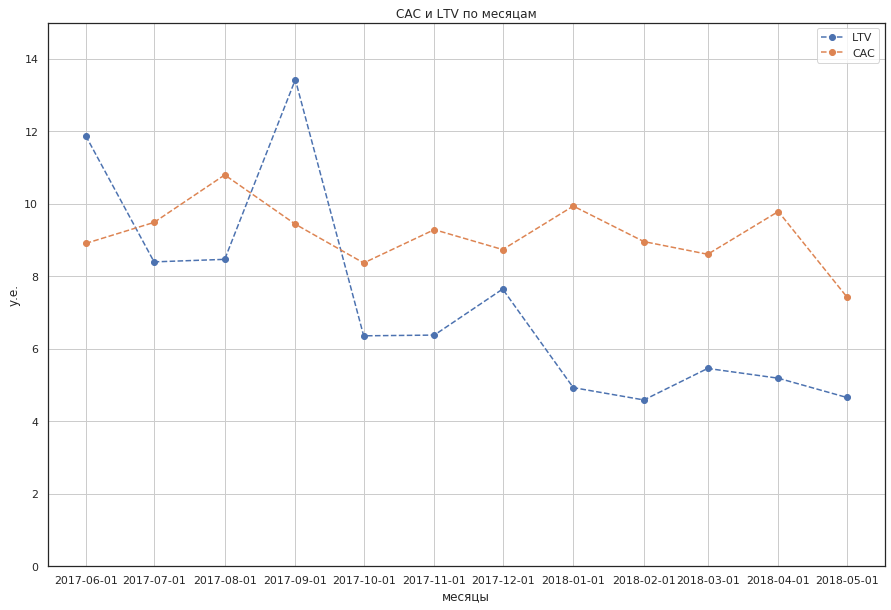

In [28]:
cac_month['ltv'] = list(ltv_pivot.sum(axis=1).round(2)[0:-1])
plt.figure(figsize = (15,10))
plt.plot(cac_month['first_buy_month'], cac_month[['ltv', 'cac_month']], '--o')
plt.grid(True)
plt.ylim(0,15)
plt.legend(['LTV', 'CAC'])
plt.title('CAC и LTV по месяцам')
plt.ylabel('у.е.')
plt.xlabel('месяцы')
plt.xticks(cac_month['first_buy_month'])
plt.show()

LTV превосходит CAC только для двух когорт. В конце графика это закономерно, когорты еще не "выросли", но в начале прямо-таки настораживает.

buy_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
source_id,,,,,,,,,,,,,
1,0.12,0.31,0.47,0.87,1.42,1.97,2.87,3.24,3.67,4.19,4.52,4.88,NaN
2,0.05,0.10,0.13,0.18,0.27,0.36,0.47,0.53,0.66,0.82,0.89,1.01,NaN
3,0.01,0.03,0.04,0.07,0.10,0.14,0.18,0.20,0.24,0.27,0.29,0.31,NaN
4,0.02,0.06,0.08,0.11,0.18,0.24,0.32,0.37,0.43,0.50,0.55,0.60,0.6
5,0.03,0.05,0.08,0.12,0.19,0.23,0.27,0.31,0.35,0.39,0.41,0.44,NaN
9,0.02,0.04,0.05,0.07,0.11,0.15,0.19,0.22,0.26,0.31,0.32,0.34,NaN
10,0.02,0.04,0.04,0.06,0.12,0.17,0.20,0.24,0.28,0.33,0.36,0.42,NaN


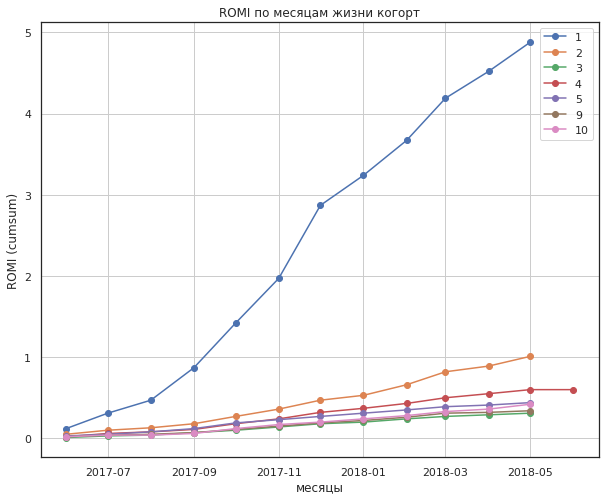

In [29]:
orders_source = orders.merge(cac_source, on ='source_id')
orders_source_sum = orders_source.groupby(['source_id','buy_month'], as_index=False).agg({'revenue':'sum'})
orders_source_ltv = orders_source.merge(orders_source_sum, on = ['source_id','buy_month'])
orders_source_ltv['ltv'] = orders_source_ltv['revenue_y'] / orders_source_ltv['buyers_source']
orders_source_ltv['romi'] = orders_source_ltv['ltv'] / orders_source_ltv['cac_source']
output = orders_source_ltv.pivot_table(index='source_id', columns='buy_month', values='romi', aggfunc='mean')
output_final = output.cumsum(axis=1).round(2)
display(output_final)
plt.figure(figsize=(10,8))
plt.plot(output_final.T, '-o')
plt.legend(output_final.index)
plt.grid(True)
plt.title('ROMI по месяцам жизни когорт') #Return on Marketing Investment - показатель рентабельности маркетинговых кампаний
plt.ylabel('ROMI (cumsum)')
plt.xlabel('месяцы')
plt.show()

Источник 1 окупился к 5 месяцу, второй - к 11-му, остальные не смогли. Посмотрим на всякий случай, как изменялась прибыль с пользователей по источникам.

In [30]:
output2 = orders_source_ltv.pivot_table(index='source_id', columns='buy_month', values='ltv', aggfunc='mean').round(2)
output_source = output2.cumsum(axis=1)
display(output_source)

buy_month,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01
source_id,,,,,,,,,,,,,
1,0.36,0.91,1.38,2.53,4.14,5.76,8.40,9.47,10.72,12.25,13.21,14.26,NaN
2,0.37,0.83,1.03,1.43,2.14,2.90,3.76,4.24,5.34,6.59,7.14,8.09,NaN
3,0.22,0.46,0.64,1.01,1.51,2.03,2.59,3.00,3.46,3.92,4.19,4.50,NaN
4,0.17,0.43,0.59,0.83,1.31,1.80,2.37,2.76,3.23,3.76,4.12,4.48,4.48
5,0.27,0.59,0.83,1.30,2.01,2.40,2.91,3.27,3.70,4.09,4.34,4.70,NaN
9,0.18,0.37,0.56,0.73,1.14,1.58,2.04,2.27,2.69,3.24,3.36,3.57,NaN
10,0.14,0.23,0.28,0.37,0.77,1.10,1.33,1.58,1.82,2.17,2.40,2.77,NaN


Для хорошей визуализации нужны не все столбцы:

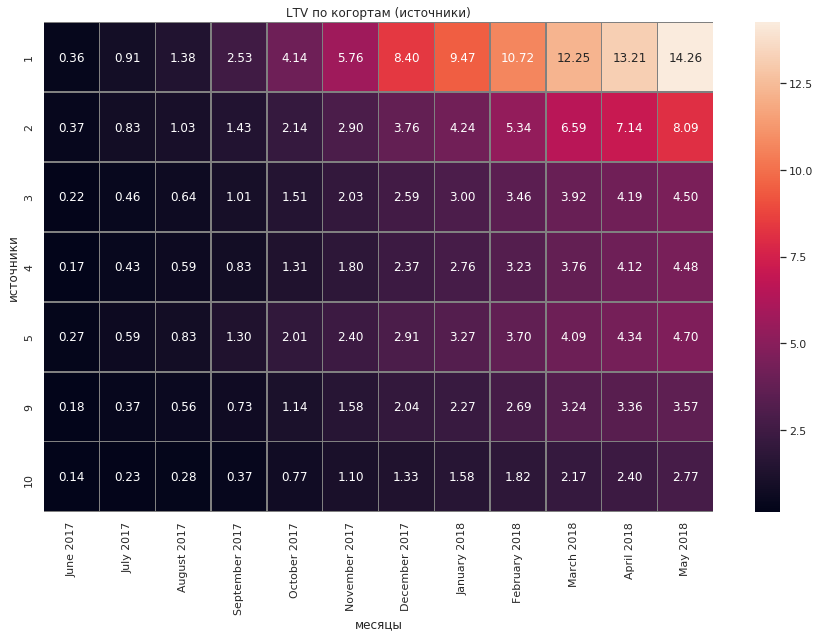

In [31]:
output_map = output_source.drop(columns = output_source.columns[-1])
ticks3 = output_map.columns.strftime('%B %Y')
sns.set(style='white')
plt.figure(figsize=(15, 9))
plt.title('LTV по когортам (источники)')
sns.heatmap(output_map, annot=True, linewidths=0.5, fmt='.2f', linecolor='gray', xticklabels=ticks3)
plt.ylabel('источники')
plt.xlabel('месяцы')
plt.show()

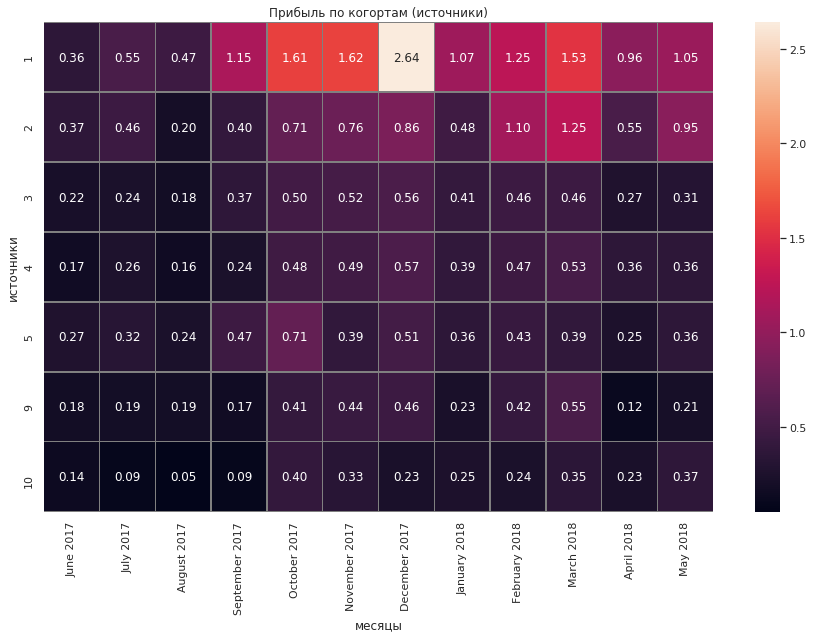

In [32]:
output_profit = (
    orders_source_ltv
    .pivot_table(index='source_id', columns='buy_month', values='ltv', aggfunc='mean')
    .round(2)
)
output_profit = output_profit.drop(columns = output_profit.columns[-1])
ticks4 = output_profit.columns.strftime('%B %Y')
sns.set(style='white')
plt.figure(figsize=(15, 9))
plt.title('Прибыль по когортам (источники)')
sns.heatmap(output_profit, annot=True, linewidths=0.5, fmt='.2f', linecolor='gray', xticklabels=ticks4)
plt.ylabel('источники')
plt.xlabel('месяцы')
plt.show()

Действительно, в октябре-январе карта выглядит "теплее" - повышение маркетинговых расходов не прошло зря.

## <a id="concl">Выводы и рекомендации</a>

На мой взгляд, маркетологам следует обратить внимание на источник номер 1 и номер 2. При высоких затратах на себя источник 3 приносит мало прибыли. Люди редко возвращаются на сайт, а могли бы - перед каждым уикэндом! Будут чаще заходить за информацией и чаще заказывать именно на Афише. А теперь подробнее.
***
В среднем в день на сайт заходят 908 человек, в неделю - 5621, а в месяц - около 23 тысяч. Липкие факторы для недели и месяца - 16,15% и 3,91%. Среднее число заходов в день: 1.082, в неделю: 1.179. Все это говорит о том, что Афишей не пользуются ежедневно - сайт применяют по потребности. Мода распределения длительности заходов - 60 секунд, среднее - более чем 600, медиана - 300, средняя длительность и число заходов выше в околоновогоднее время, что связано, вероятно, с большим предложением различного досуга и высоким спросом на него в праздники. Retention Rate уверенно снижается: самую большую приверженность демонстрирует когорта первого месяца периода. На второй месяц на сайт заходят в среднем 6,5% пользователей. Либо наши пользователи редко позволяют себе развлечения, либо пользуются какими-то другими источниками информации. Я вижу здесь перспективы: стоит попытаться превратить сайт в еженедельный источник информации о новинках, вернее, привить пользователям привычку заходить на него почаще. Подружиться с Антоном Долиным?
***
Чаще всего пользователи становятся покупателями при первом заходе на сайт. За полгода они делают 2,61 заказов. Интуитивно кажется, что люди ходят на мероприятия чаще, т.е. покупают билеты на них через другие сервисы. Средняя стоимость заказа изменяется волнообразно, гребни волн приходятся на новогодние праздники и, вероятно, дни премьер. Самой прибыльной (ltv) стали когорты июня (первого месяца диапазона) и сентября (на них как-то очень хорошо повлияли события января - возможно, провели какую-то акцию). Когорта за 6 месяцев существования собирает около 8 у.е. прибыли.
***
Источник 3 стоит дороже всего, за ним - 4 и 5. Затраты на все источники трафика выросли в октябре-январе, что нашло отражение в некотором увеличении прибыли по источникам в это время. Итоговая стомость привлечения клиента составила около 9 у.е., что больше полугодовых сборов с когорты, самыми дорогими являются клиенты, привлеченные с 3, 5 и 9 источника, а самыми дешевыми - с первого. Первый источник радует хорошим ROMI и окупается на 5 месяц, второй едва окупается на 11, а остальные вовсе не окупаются в рассматриваемом периоде. Это ли не повод пересмотреть поддержку источников?
***
Наиболее перспективными являются привлеченные с 1 и 2 источника и т.н. старые когорты - они теряют в приносимых средствах меньше, чем молодые, стоит разобраться с тем, почему у вновь привлеченных не формируется столь устойчивых привычек.